# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

Using TensorFlow backend.


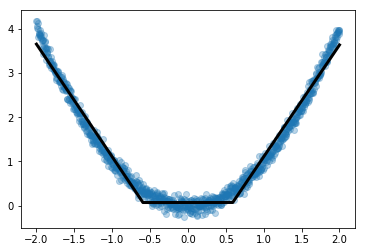

In [2]:
np.random.seed(0)

x = np.linspace(-2, 2, 1000).reshape(-1, 1)
y = x**2 + np.random.randn(*x.shape) * 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


model = Sequential()
model.add(Dense(2, activation="relu", input_dim=1))
model.add(Dense(1, activation="linear"))

model.compile(
    optimizer="sgd",
    loss="mse"
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,
    shuffle=True,
    validation_data=(x_test, y_test),
    verbose=0
)

plt.scatter(x, y, alpha=.3)
plt.plot(x, model.predict(x), c="k", lw=3)

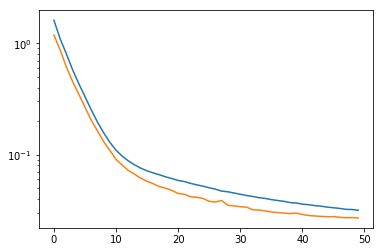

In [3]:
plt.semilogy(history.history["loss"])
plt.semilogy(history.history["val_loss"])

In [4]:
for layer in model.layers:
    w, b = layer.get_weights()
    print("W", w)
    print("b", b, "\n")

W [[-1.5607362  1.4964145]]
b [-0.9304865 -0.883126 ] 

W [[1.6332119]
 [1.6876167]]
b [0.07176439] 



In [5]:
for layer in model.layers:
    w, b = layer.get_weights()
    print("W", w)
    print("b", b, "\n")

W [[-1.5607362  1.4964145]]
b [-0.9304865 -0.883126 ] 

W [[1.6332119]
 [1.6876167]]
b [0.07176439] 



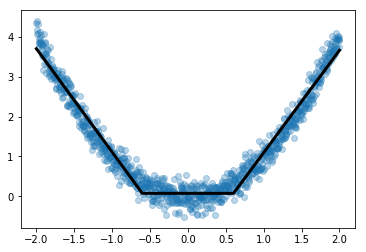

In [6]:

np.random.seed(0)

x = np.linspace(-2, 2, 1000).reshape(-1, 1)
y = x**2 + np.random.randn(*x.shape) * 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


model = Sequential()
model.add(Dense(2, activation="relu", input_shape=(1,)))
model.add(Dense(1, activation="linear"))

model.compile(
    optimizer="sgd",
    loss="mse"
)



predictions = [model.predict(x)]
loss = []
val_loss = []

for _ in range(50):
    
    history = model.fit(
        x_train, y_train,
        epochs=1,
        batch_size=16,
        shuffle=True,
        validation_data=(x_test, y_test),
        verbose=0
    )
    
    predictions.append(model.predict(x))
    loss.append(history.history["loss"][0])
    val_loss.append(history.history["val_loss"][0])
    
plt.scatter(x, y, alpha=0.3)
plt.plot(x, model.predict(x), c="k", lw=3)

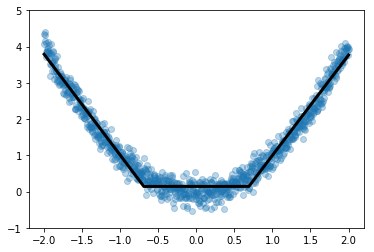

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML

# I assume you have a *compiled but not trained net* at this point
# For a completely random initialisation, generate predictions
predictions = [model.predict(x)]

# Iterating over epochs
for _ in range(50):
    
    # Train for one epoch
    history = model.fit(
        x_train, y_train,
        epochs=1,
        batch_size=16,
        shuffle=True,
        validation_data=(x_test, y_test),
        verbose=0
    )
    
    # Make some predictions
    predictions.append(model.predict(x))


# Set the plot scope
fig, ax = plt.subplots()
ax.set_xlim((-2.2, 2.2))
ax.set_ylim((-1, 5))

# Set the target data, as well as an empty container for the animated line
ax.scatter(x, y, alpha=0.3)
line, = ax.plot([], [], lw=3, c="k")

# Initialisation of the empty line
def init():
    line.set_data([], [])
    return (line,)

# Update of the line
def animate(i):
    line.set_data(x, predictions[i])
    return (line,)

# Generate the animation
anim = animation.FuncAnimation(
    fig, 
    animate, 
    init_func=init,
    frames=len(predictions), 
    interval=70, 
    blit=True
)

# Animate inside the Jupyter Notebook
HTML(anim.to_html5_video())


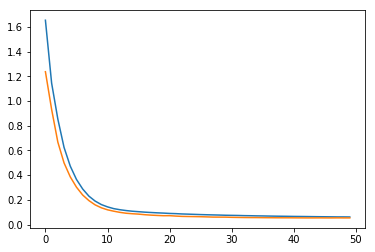

In [8]:
plt.plot(loss)
plt.plot(val_loss)